### **TUTORIAL 1: ANALYTICS FOR PERCEPTION**



# Step 0: Does this work?

In [3]:
print("Hello World!")

Hello World!


# Step 1: Import some modules

Never reinvent the wheel! There are tons of programs out there that we can simply import into our own code and use as needed. If you want to know more, or find useful modules, check out [PyPI](https://pypi.org/) (the Python Package Index).

In [4]:
import pandas as pd # for data structure and data analysis
import statsmodels.api as sm # for statistical analysis
from scipy import stats #for statistical analysis & machine learning
from scipy.stats.mstats import zscore #to standardize regression coefficients
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) #to standardize regression coefficients
import matplotlib.pyplot as plt #to plot
import numpy as np #to handle arrays and matrixes
import seaborn as sns #to plot
import matplotlib.pyplot as plt #to plot
import numpy as np #to handle arrays and matrixes
print("Module import completed!")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module import completed!


So what, exactly, are we doing here?


*   "import X as Y": We import the whole module X, but we use Y to refer to it (because we really don't want to write matplotlib.pyplot every time we use it)
*   "from X import Y": We don't want all of X, but we care specially about one function, Y. Also, this way we can refer to Y directly




# Step 2: Define functions for plotting correlation matrix and regression coefficients

A function is like a recipe for your computer: it bundles a set of instructions, so that the computer can work its way from a well-defined input (flour, baking powder, milk, eggs), to a well-defined output ([pancakes](https://www.kingarthurflour.com/recipes/simply-perfect-pancakes-recipe)).

Functions are useful, because we would rather just tell our computer to make pancakes than to explain all the instructions every time we are hungry.

Let's teach our computer something more simple than making pancakes first:

In [5]:
def sum_numbers(x, y):
    result = x + y
    return result

Our function lets us sum any two numbers by calling it:

In [6]:
sum_numbers(3,6)

9

We are now ready to define the functions we will use to plot our graphs. Don't worry too much about the details - we are just teaching our computer a specific recipe.

In [7]:
#function to plot correlation matrix
def plot_corr(corr):
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Generate a custom diverging colormap
    # sns.palplot(sns.diverging_palette(240, 0)) Uncomment to try out different color palettes to use below
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.15,vmin=-0.15,  # vmax and vmin define the upper and lower boundaries of the colormap respectively
                square=True, linewidths=.5, cbar_kws={"shrink": .5})


#define function to plot coefficients and confidence intervals
def plot_coef(model):
    err_series = model.params - model.conf_int(alpha=0.05)[0]
    coef_df = pd.DataFrame({'coef': model.params.values[1:],
                            'err': err_series.values[1:],
                            'varname': err_series.index.values[1:]
                           })
    fig, ax = plt.subplots(figsize=(8, 5))
    coef_df.plot(x='varname', y='coef', kind='bar', 
                 ax=ax, color='none', 
                 yerr='err', legend=False)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='s', s=120, 
               y=coef_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    
    
print ("Plotting function definition completed!")

Plotting function definition completed!


# Step 3: Make data available within the program

## Step 3.1: Upload the data file from your local computer to Google Drive

Luckily, Google makes our life very easy - we just need to run the code below and then we can upload our file to Google drive.

In [9]:
import os.path
from google.colab import files
if not os.path.exists("Hyp_employees.csv"):
    uploaded = files.upload()

Saving Hyp_employees.csv to Hyp_employees.csv


## Step 3.2: set a path to your data CSV file (Database.csv) and acces your data

We use [Pandas](https://www.learnpython.org/en/Pandas_Basics), a popular module 
in Python (not to be confused with this [cute guy](https://www.worldwildlife.org/species/giant-panda)), to store the data from the CSV in a way that Python can work with it.

In [12]:
path = "Hyp_employees.csv"
df = pd.read_csv(path, sep = ",") # create a pandas data frame to store data, set the type of separator used in your CSV file

Let's take a sneak peak at what we imported:

In [13]:
df.head()

,new_id,age,gender,undergradranking,gpa,didmba,extracurriculars,maturityassesment,programmingskill,disciplinetest,ambitiousnesstest,creativitytest,neuroticismtest,extraversiontest,teamquality,tenure,currentseniority,mainperformancemetric
0,1,48,0,3,4.00,0,3,2,40,9,7,4,5,5,2,19,9,5
1,2,46,0,3,4.00,0,7,4,37,6,6,5,5,4,2,18,9,7
2,3,48,1,3,4.00,0,3,2,32,7,7,5,6,5,1,18,9,5
3,4,44,0,3,3.91,0,3,3,55,3,6,6,7,5,1,17,10,5
4,5,45,0,3,4.00,0,3,2,44,5,4,4,8,4,1,17,9,5


We can also get a summary of each column:

In [ ]:
summary_stats = df.describe()
print(summary_stats)

# Step 4: Bivariate tests (t-tests) WE WILL NOT BE ODOING THIS STEP IN CLASS - THE VARIABLES ARE FROM PHANISH'S EXERCISE, SO IGNORE

Let's see whether we can find any initial trends in the data. For example, are women more likely to exit the firm? We will use [t-tests](https://towardsdatascience.com/the-statistical-analysis-t-test-explained-for-beginners-and-experts-fd0e358bbb62) to analyze the difference in means:

In [14]:
tstat = sm.stats.ttest_ind(df[df.gender==0].exit,df[df.gender==1].exit)[0] 
pvalue = sm.stats.ttest_ind(df[df.gender==0].exit,df[df.gender==1].exit)[1] 

print('the tstat for gender differences in exit is =', tstat)
print('the pvalue is =', pvalue)

AttributeError: ignored

The data indicates that women are, on average, more likely to quit. However, the finding is not very [significant from a statistical perspective](https://hbr.org/2016/02/a-refresher-on-statistical-significance). Also, don't forget that we are just taking a look at two variables, ignoring a lot of other things information!

Maybe exiters are paid more?


In [15]:
tstat = sm.stats.ttest_ind(df[df.exit==0].salary,df[df.exit==1].salary)[0]
pvalue =  sm.stats.ttest_ind(df[df.exit==0].salary,df[df.exit==1].salary)[1]

print('the tstat for salary differences in exit is =', tstat)
print('the pvalue is =', pvalue)

AttributeError: ignored

There indeed is a difference in average salary between those that exit and those that don't. This time, statistically speaking, we can be more sure of this difference. But again, don't forget that we are looking at only two variables right now, i.e. we are assuming all else is equal.

**Exercise:** can you write a test to check if exiters (1) have higher or lower job satisfaction than stayers?





If you need help, you can find the answer below:

In [ ]:
#@title
tstat = sm.stats.ttest_ind(df[df.exit==1].job_satisfaction,df[df.exit==0].job_satisfaction)[0]
pvalue =  sm.stats.ttest_ind(df[df.exit==1].job_satisfaction,df[df.exit==0].job_satisfaction)[1]

print('the tstat for job satisfaction of exiters is =', tstat)
print('the pvalue is =', pvalue)

# Step 5: Multiple bivariate associations

We create a new pandas data frame to store the [correlation](https://https://en.wikipedia.org/wiki/Correlation_and_dependence) information and use our custom-made plot_corr function to visualize it.

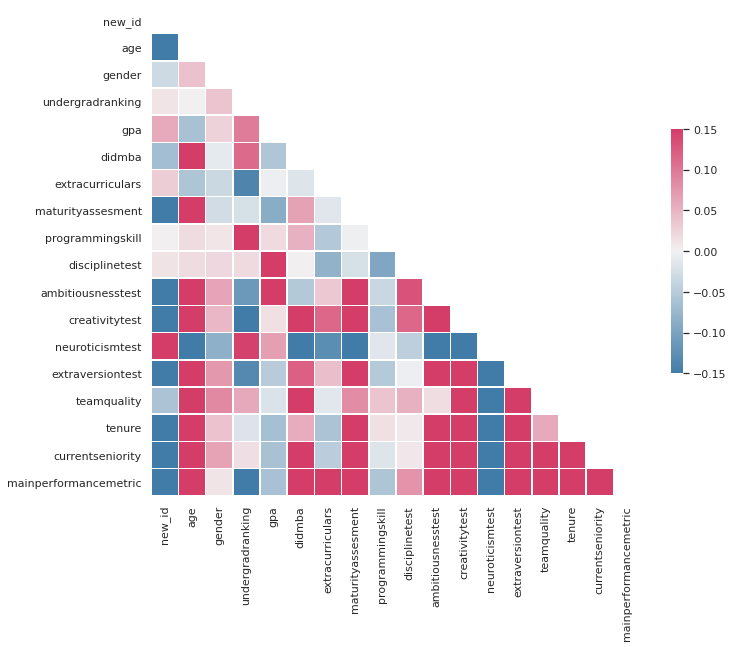

In [16]:
correlation_matrix = df.corr(method='pearson', min_periods=1)
plot_corr(correlation_matrix)

# Step 6: Multi-variate analysis with OLS

In an [ordinarly least squares, or OLS regression](https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/ordinary-least-squares-regression), we try to understand the *simultaenous* effect of multiple independent variables (X), on our dependet variable (y). As an example, we want to see how education and age, together, influence an employee's salary.

I think comments need to be put in here rather than below

In [ ]:
 3. Regression

# We will now run some regression to understand how employee features 
# influence their performance.

y = 

# 3.1 Regression with all variables
# Performance regression with all variables - notice that maturity assessment 
# and outside experience are no longer significant once including tenure/age. 

x = hiringData.drop({"mainPerformanceMetric","ID"},axis=1)
model1 = sm.OLS(y,x).fit()

print(model1.summary())

# You can also produce a table with just the coefficients with significance 
# stars using the code below 
print("\n")
print("3.1.2 Table with Significance Stars")
print(summary_col(model1, stars=True))

Standardizing our data sometimes makes it easier to interpret. For this, we simply compute the [z-score](https://www.statisticshowto.com/probability-and-statistics/z-score/) of each column. We also want a constant in our model (which forms the intercept of the regression model).

In [ ]:
X_std = pd.DataFrame(data=zscore(X),
                     columns=list(X.columns))
X_std = sm.add_constant(X_std)

We are now ready to fit our OLS model:

In [ ]:
model = sm.OLS(y,X_std).fit()
model_summary = model.summary()
print (model_summary) 

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1219.
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:51:16   Log-Likelihood:                -59814.
No. Observations:               18132   AIC:                         1.196e+05
Df Residuals:                   18129   BIC:                         1.197e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9909      0.049    801.186      0.0

Let's get a better look at the data, by using our custom-built visualization function:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


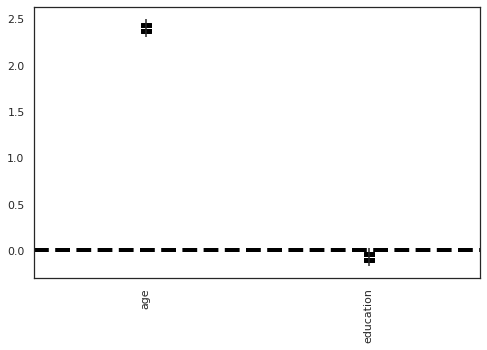

In [ ]:
plot_coef(model)

What we actually care about is, whether employees exit the company. Hence, y should indicate whether an employee is an exiteer (not to be confused with a [Brexiteer](https://en.wikipedia.org/wiki/Glossary_of_Brexit_terms)). We combine all available information, in order to try to explain why someone left:

In [ ]:
X = df.loc[:, df.columns != "exit"]
y = df["exit"]

Don't forget to standardize and add a constant!

In [ ]:
X_std = pd.DataFrame(data=zscore(X),
                     columns=list(X.columns))
X_std = sm.add_constant(X_std)

We are now ready to fit our OLS model:

In [ ]:
model = sm.OLS(y,X_std).fit()
model_summary = model.summary()
print (model_summary) 

                            OLS Regression Results                            
Dep. Variable:                   exit   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:51:16   Log-Likelihood:                -4612.2
No. Observations:               18132   AIC:                             9276.
Df Residuals:                   18106   BIC:                             9479.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

Let's get a better look at the data, by using our custom-built visualization function:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


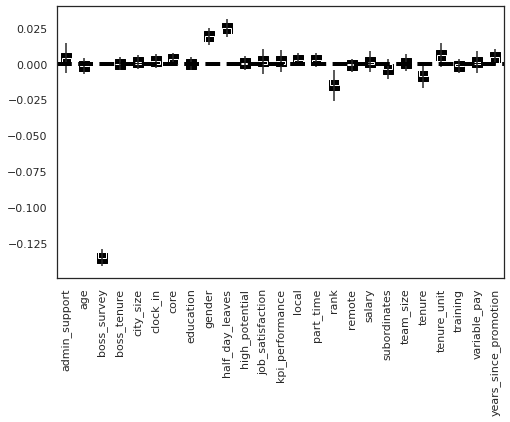

In [ ]:
plot_coef(model)

Before we move onto the logit regression, we first save our model as a CSV. You may need to allow Google to download the file to your computer.

In [ ]:
# create instance which open a CSV file in "writing" ('w') mode
CSV_writer = open("ExiteerOLSModel.csv","w")
# write results of the OLS in CSV
CSV_writer.write(model_summary.as_csv())
# close CSV-writer instance
CSV_writer.close()
from google.colab import files
files.download("ExiteerOLSModel.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 7: Multivariate analysis with Logit

In a [Logistic (or Logit) regression](https://en.wikipedia.org/wiki/Logistic_regression), we try to understand the *simultaenous* effect of multiple independent variables (X), on our dependet variable (y), when y is either 0 or 1, exactly as in our problem!

In [ ]:
model_logit = sm.Logit(endog=y, exog=X_std).fit()
model_logit_summary= model_logit.summary()
print (model_logit_summary)

Optimization terminated successfully.
         Current function value: 0.302018
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   exit   No. Observations:                18132
Model:                          Logit   Df Residuals:                    18106
Method:                           MLE   Df Model:                           25
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.2387
Time:                        14:51:17   Log-Likelihood:                -5476.2
converged:                       True   LL-Null:                       -7193.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.5565      0.035    -73.566      0.000      -2.625      -2.

We can, again, use our custom-made visualization function:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


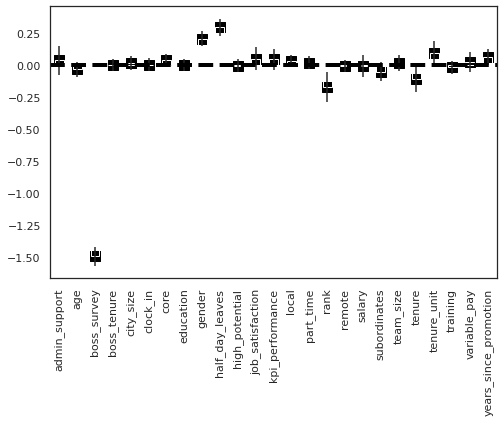

In [ ]:
plot_coef(model_logit)

For further reading on Logit, see, for example, [here](https://statisticalhorizons.com/whats-so-special-about-logit). For more on Logit in Python, see [here](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python).

We again save the model as a CSV export for future reference:

In [ ]:
# create instance which open a CSV file in "writing" ('w') mode
CSV_writer = open("ExiteerLogitModel.csv","w")
# write results of Logit in CSV
CSV_writer.write(model_logit_summary.as_csv())
# close CSV-writer instance
CSV_writer.close()
from google.colab import files
files.download("ExiteerLogitModel.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>